## Clean And Analyze Employee Exit Surveys
---------------------------------------------

In this project we will clean the data and analyze employee exit surveys of Department of Education, Training and Employment (**DETE**) and the Technical and Further Education (**TAFE**) institute in Queensland, Australia.

We will try to answer the following questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

In [184]:
# IMPORTS
import pandas as pd
import numpy as np

# SETTINGS
%matplotlib inline

pd.options.display.max_columns = 50

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [185]:
# Read data files
dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")
tafe_survey = pd.read_csv("tafe_survey.csv", engine='python')

#### Exploring data sets
- Both data sets have null values. Most of the columns have few to 200 null values and few columns have nearly all null values
- Range of column values are as below
    - Yes/No
    - True/False
    - Strongly Agree/Agree..../Strongly Disagree/NA (both in short form and abbreviated form)
    - Few custom options to choose from
    - Few "not stated" values in the data that are not represented as NaN.

-------------------------
Since the questions which we want to answer does not need many columns in the data sets lets remove them for ease of working.

In [186]:
# drop some columns from each dataframe that we won't use in our analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

Now lets clean the column names and arrive at a standard as eventually we want to merge these datasets.

- we will strip any leading or trailing spaces
- use lower case
- replace "space" with "_"
- rename columns in tafe dataset to match names in dete dataset

In [187]:
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.lower().str.replace(' ', '_')

tafe_survey_updated.columns = tafe_survey_updated.columns.str.strip().str.replace('\s+', ' ')
tafe_survey_updated = tafe_survey_updated.rename({'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'institute_service'}, axis=1)

dete_survey_updated.head(2)
tafe_survey_updated.head(2)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN


,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,LengthofServiceOverall. Overall Length of Service at Institute (in years),institute_service
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 – 30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
dete_survey_updated['separationtype'].value_counts()
tafe_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

If we look into unique values of "separationtype" column, there are different types. For now we will look at only "Resignation" type for our analysis.

In [189]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].isin(['Resignation-Other reasons', 'Resignation-Other employer', 'Resignation-Move overseas/interstate'])].copy()

tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

---------------
Now we will look into "cease_date" and "dete_start_date" columns for any abnormalities.

dete_resignations['cease_date']
 2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64
tafe_resignations['cease_date']
 2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64
dete_resignations['dete_start_date']
max: 2013.0 min: 1963.0


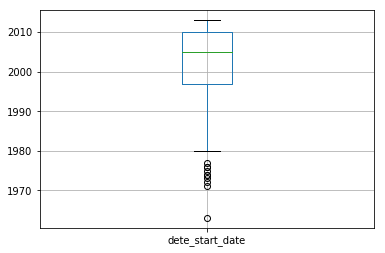

In [190]:
print("dete_resignations['cease_date']\n", dete_resignations['cease_date'].str[-4:].value_counts())
print("tafe_resignations['cease_date']\n", tafe_resignations['cease_date'].value_counts())
print("dete_resignations['dete_start_date']")
print("max:", dete_resignations['dete_start_date'].max(),"min:", dete_resignations['dete_start_date'].min())
dete_resignations.boxplot('dete_start_date');

#### Findings
- We do not see any year later than current year
- Also we do not find any issues with start date where 1963 is the lowest value which seems good.
- These columns are good to proceed for further analysis.

In [191]:
dete_resignations['institute_service'] = dete_resignations['cease_date'].str[-4:].astype('float') - dete_resignations['dete_start_date']
print(dete_resignations['institute_service'].value_counts(bins=10))

(-0.05, 4.9]    92
(4.9, 9.8]      75
(9.8, 14.7]     30
(14.7, 19.6]    26
(19.6, 24.5]    24
(29.4, 34.3]     8
(24.5, 29.4]     8
(34.3, 39.2]     7
(39.2, 44.1]     2
(44.1, 49.0]     1
Name: institute_service, dtype: int64


Since "dete_resignations" dataset do not have an explicit column for employee tenure in the company unlike "tafe_resignations" dataset, hence we have added a new column.

---------------------
Next, we'll identify any employees who resigned because they were dissatisfied.
We shall consider the below column from "tafe_resignations":
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

In [192]:
def update_val(element):
    if pd.isnull(element):
        return np.nan
    if element == '-':
        return False
    else:
        return True

tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_val)

tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

From the above we see that there 91 dissatisfied entries in tafe survey.
Lets do the same analysis on dete survey. We shall use the below columns from dete.
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

Since these columns are already in boolean form, we will skip the conversion part.

In [193]:
dete_resignations['dissatisfied'] = dete_resignations[["job_dissatisfaction", "dissatisfaction_with_the_department", "physical_work_environment", "lack_of_recognition", "lack_of_job_security", "work_location", "employment_conditions", "work_life_balance", "workload"]].any(axis=1, skipna=False)
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [194]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

--------------
Now let's combine the datasets for our final analysis. We shall add a new column to each dataset to easily distinguish the data.

In [195]:
dete_resignations_up['institute'] = "DETE"
tafe_resignations_up['institute'] = "TAFE"

combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined.head()

,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,Contributing Factors. Study,Contributing Factors. Travel,Institute,LengthofServiceOverall. Overall Length of Service at Institute (in years),WorkArea,aboriginal,age,business_unit,career_move_to_private_sector,career_move_to_public_sector,cease_date,classification,dete_start_date,disability,dissatisfaction_with_the_department,...,gender,id,ill_health,institute,institute_service,interpersonal_conflicts,job_dissatisfaction,lack_of_job_security,lack_of_recognition,maternity/family,nesb,none_of_the_above,physical_work_environment,position,region,relocation,role_start_date,separationtype,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36-40,NaN,True,False,05/2012,Primary,2005.0,NaN,False,...,Female,4,False,DETE,7,False,False,False,False,False,NaN,False,False,Teacher,Central Queensland,False,2006.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41-45,Education Queensland,True,False,05/2012,NaN,1994.0,NaN,False,...,Female,6,False,DETE,18,False,False,False,False,True,NaN,False,False,Guidance Officer,Central Office,False,1997.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-35,NaN,True,False,07/2012,Secondary,2009.0,NaN,False,...,Female,9,False,DETE,3,False,False,False,False,False,NaN,False,False,Teacher,North Queensland,False,2009.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46-50,NaN,False,False,2012,NaN,1997.0,NaN,True,...,Female,10,False,DETE,15,True,True,False,False,False,NaN,False,False,Teacher Aide,NaN,False,2008.0,Resignation-Other employer,NaN,False,NaN,False,False,False,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-35,NaN,False,False,2012,Secondary,2009.0,NaN,False,...,Male,12,False,DETE,3,False,False,False,False,True,NaN,False,False,Teacher,Far North Queensland,True,2009.0,Resignation-Move overseas/interstate,NaN,False,NaN,False,False,False,False


We still have some columns left in the dataframe that we don't need to complete our analysis. Lets drop them for a clean dataset

In [196]:
combined_updated = combined.dropna(axis=1, thresh=500)
combined_updated.shape
combined_updated.head()

(651, 10)

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,05/2012,False,Permanent Full-time,Female,4,DETE,7,Teacher,Resignation-Other reasons
1,41-45,05/2012,True,Permanent Full-time,Female,6,DETE,18,Guidance Officer,Resignation-Other reasons
2,31-35,07/2012,False,Permanent Full-time,Female,9,DETE,3,Teacher,Resignation-Other reasons
3,46-50,2012,True,Permanent Part-time,Female,10,DETE,15,Teacher Aide,Resignation-Other employer
4,31-35,2012,False,Permanent Full-time,Male,12,DETE,3,Teacher,Resignation-Move overseas/interstate


If we look at the "institue_service" column, we'll notice that we have to clean it up. We will follow the below logic to categorize the tenure.
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [197]:
def ser_cat(val):
    if pd.isnull(val):
        return np.nan
    if val < 3:
        return "New"
    if val >= 3 and val <= 6:
        return "Experienced"
    if val > 6 and val <= 10:
        return "Established"
    else:
        return "Veteran"
    
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract("([0-9]+)").astype('float').copy()

combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(ser_cat)
combined_updated['service_cat'].value_counts(dropna=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kerne

New            222
Experienced    152
Veteran        129
NaN             88
Established     60
Name: service_cat, dtype: int64

----------------
Now lets see how the "dissatisfied" field varies for each service category.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


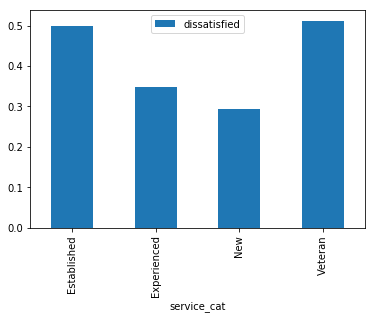

In [198]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
combined_updated_pv = combined_updated.pivot_table(values='dissatisfied', index='service_cat')

combined_updated_pv.plot(kind='bar');

### Analysis
---------------------
From the above result we can see that employees who are tenured more than 7 years in the company, 50% of them are dissatisfied with the company which is high when compared to only 30% dissatifaction rate in emplyess with less than 7 years tenure.